# Assignment 4 &emsp;&emsp; ANLY535 &emsp;&emsp; Rajkumar Dhanapal

## Code from Leacture

In [1]:
# Code using keras
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras import initializers

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
# Load dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [6]:
test_images.shape

(10000, 28, 28)

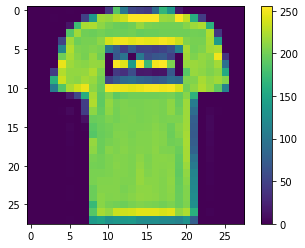

In [7]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

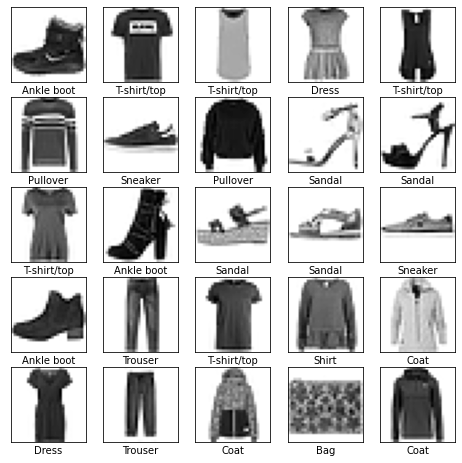

In [8]:
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
num_pixels = train_images.shape[1] * train_images.shape[2]   #28*28 = 784
X_train = train_images.reshape(train_images.shape[0], num_pixels)
X_test = test_images.reshape(test_images.shape[0], num_pixels)

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255


Y_test = test_labels 
from keras.utils import np_utils
# one hot encode outputs
y_train = np_utils.to_categorical(train_labels )
y_test = np_utils.to_categorical(test_labels )


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import tensorflow as tf



hidden_nodes = 128
num_classes = y_test.shape[1]

#tf.random.normal(shape=(hidden_nodes,num_pixels)
def baseline_model():
    # create model
    model = Sequential()
    #model.add(Dense(hidden_nodes, input_dim= num_pixels, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(hidden_nodes, kernel_initializer='normal', activation='relu'))
    #model.add(Dense(num_classes,  kernel_initializer='normal',activation='softmax'))
    model.add(Dense(hidden_nodes, input_dim= num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(hidden_nodes, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    sgd = optimizers.SGD(lr=0.01, momentum=0.0, decay= 0.00)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
    return model

In [10]:
model = baseline_model()
# Fit the model
final_model = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose= 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
375/375 [==============================] - 2s 5ms/step - loss: 1.8849 - accuracy: 0.4125 - val_loss: 1.2915 - val_accuracy: 0.6403
Epoch 2/20
375/375 [==============================] - 1s 4ms/step - loss: 1.0229 - accuracy: 0.6597 - val_loss: 0.8545 - val_accuracy: 0.6823
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.7934 - accuracy: 0.7067 - val_loss: 0.7305 - val_accuracy: 0.7328
Epoch 4/20
375/375 [==============================] - 1s 4ms/step - loss: 0.7008 - accuracy: 0.7491 - val_loss: 0.6689 - val_accuracy: 0.7617
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.6416 - accuracy: 0.7761 - val_loss: 0.6191 - val_accuracy: 0.7860
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.5982 - accuracy: 0.7943 - val_loss: 0.5838 - val_accuracy: 0.7972
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.5660 - accuracy: 0.8069 - val_loss: 0.5562 - val_accuracy: 0.8052
Epoch 

In [11]:
predictions = model.predict(X_test)
predictions[0]

array([2.7150538e-06, 4.9594985e-07, 3.3451292e-06, 2.4692197e-06,
       3.8752069e-06, 7.4653029e-02, 2.2965371e-05, 1.5157191e-01,
       1.8318761e-03, 7.7190727e-01], dtype=float32)

In [12]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
  
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
  
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1]) 
    predicted_label = np.argmax(predictions_array)
 
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

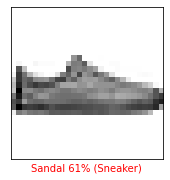

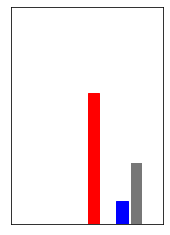

In [13]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, Y_test, test_images)
plt.show()
plt.subplot(1,2,2)
plot_value_array(i, predictions,  Y_test)
plt.show()

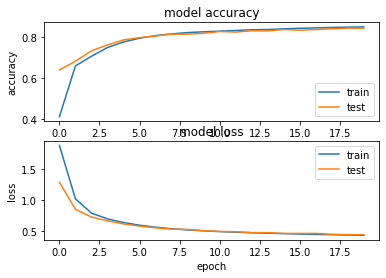

In [14]:
plt.subplot(2,1,1)
plt.plot(final_model.history['accuracy'])
plt.plot(final_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(final_model.history['loss'])
plt.plot(final_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

## Assignment

In [15]:
#running the baseline model for 55 epochs
model = baseline_model()
# Fit the model
final_model = model.fit(X_train, y_train, validation_split=0.2, epochs=55, batch_size=128)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose= 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/55
375/375 [==============================] - 1s 3ms/step - loss: 1.8671 - accuracy: 0.5044 - val_loss: 1.2668 - val_accuracy: 0.6432
Epoch 2/55
375/375 [==============================] - 1s 3ms/step - loss: 1.0017 - accuracy: 0.6719 - val_loss: 0.8345 - val_accuracy: 0.7061
Epoch 3/55
375/375 [==============================] - 1s 3ms/step - loss: 0.7781 - accuracy: 0.7203 - val_loss: 0.7193 - val_accuracy: 0.7446
Epoch 4/55
375/375 [==============================] - 1s 4ms/step - loss: 0.6909 - accuracy: 0.7538 - val_loss: 0.6545 - val_accuracy: 0.7745
Epoch 5/55
375/375 [==============================] - 1s 3ms/step - loss: 0.6330 - accuracy: 0.7782 - val_loss: 0.6134 - val_accuracy: 0.7857
Epoch 6/55
375/375 [==============================] - 1s 3ms/step - loss: 0.5926 - accuracy: 0.7937 - val_loss: 0.5789 - val_accuracy: 0.7958
Epoch 7/55
375/375 [==============================] - 1s 3ms/step - loss: 0.5620 - accuracy: 0.8052 - val_loss: 0.5560 - val_accuracy: 0.8019
Epoch 

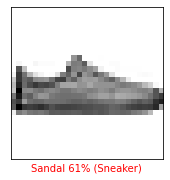

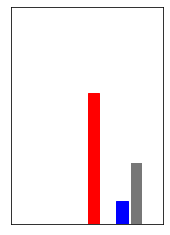

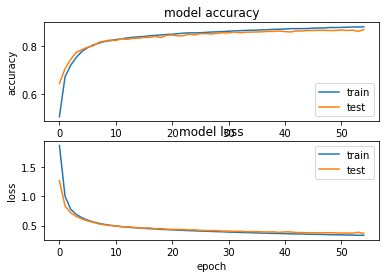

In [18]:
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, Y_test, test_images)
plt.show()
plt.subplot(1,2,2)
plot_value_array(i, predictions,  Y_test)
plt.show()

plt.subplot(2,1,1)
plt.plot(final_model.history['accuracy'])
plt.plot(final_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(final_model.history['loss'])
plt.plot(final_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

Epoch 1/55
375/375 [==============================] - 1s 3ms/step - loss: 0.6154 - accuracy: 0.7868 - val_loss: 0.4541 - val_accuracy: 0.8359
Epoch 2/55
375/375 [==============================] - 1s 2ms/step - loss: 0.4168 - accuracy: 0.8518 - val_loss: 0.4078 - val_accuracy: 0.8574
Epoch 3/55
375/375 [==============================] - 1s 3ms/step - loss: 0.3691 - accuracy: 0.8682 - val_loss: 0.3709 - val_accuracy: 0.8662
Epoch 4/55
375/375 [==============================] - 1s 2ms/step - loss: 0.3367 - accuracy: 0.8761 - val_loss: 0.3495 - val_accuracy: 0.8753
Epoch 5/55
375/375 [==============================] - 1s 2ms/step - loss: 0.3199 - accuracy: 0.8829 - val_loss: 0.3468 - val_accuracy: 0.8788
Epoch 6/55
375/375 [==============================] - 1s 2ms/step - loss: 0.3023 - accuracy: 0.8890 - val_loss: 0.3598 - val_accuracy: 0.8705
Epoch 7/55
375/375 [==============================] - 1s 2ms/step - loss: 0.2882 - accuracy: 0.8943 - val_loss: 0.3423 - val_accuracy: 0.8740
Epoch 

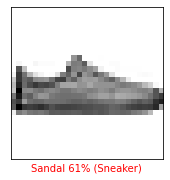

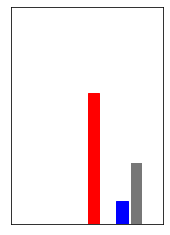

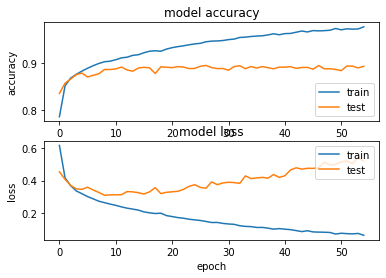

In [20]:
# defining model with 55 epochs and SGD optimizer
def model_1():
    # create model
    model = Sequential()
    model.add(Dense(hidden_nodes, input_dim= num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(hidden_nodes, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    adam = optimizers.Adam(learning_rate=0.001,beta_1=0.9,beta_2=0.999)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

#running the model with adam optimizer for 55 epochs
model = model_1()
# Fit the model
final_model = model.fit(X_train, y_train, validation_split=0.2, epochs=55, batch_size=128)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose= 0)
print("Accuracy: %.2f%%" % (scores[1]*100))

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, Y_test, test_images)
plt.show()
plt.subplot(1,2,2)
plot_value_array(i, predictions,  Y_test)
plt.show()

plt.subplot(2,1,1)
plt.plot(final_model.history['accuracy'])
plt.plot(final_model.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(final_model.history['loss'])
plt.plot(final_model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()